In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
print(tf.__version__)

2.5.0


In [2]:
#!pip3 install tensorflow-gpu

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import scipy.stats as stats

In [4]:
file = open('../data/MobiAct/raw_data.csv')
lines = file.readlines()

processedList = []

for i, line in enumerate(lines):
    try:
        line = line.split(',')
        last = line[5].split(';')[0]
        last = last.strip()
        if last == '':
            break;
        temp = [line[0], line[1], line[2], line[3], line[4], last]
        processedList.append(temp)
    except:
        print('Error at line number: ', i)

In [5]:
columns = ['User','Activity','Time','x','y','z']
data = pd.DataFrame(data = processedList,columns=columns)
data.head()

,User,Activity,Time,x,y,z
0,Time,x,y,z,Activity,User
1,235423306000,-0.17238252,9.883265,-0.45010993,STD,39
2,235450722000,-0.22026655,9.921572,-0.4405331,STD,39
3,235460429000,-0.25857377,9.892841,-0.45968673,STD,39
4,235470358000,-0.24899697,9.873688000000001,-0.45010993,STD,39


In [6]:
data = pd.read_csv('../data/MobiAct/raw_data.csv')
data.head()

,Time,x,y,z,Activity,User
0,235423306000,-0.172383,9.883265,-0.450110,STD,39
1,235450722000,-0.220267,9.921572,-0.440533,STD,39
2,235460429000,-0.258574,9.892841,-0.459687,STD,39
3,235470358000,-0.248997,9.873688,-0.450110,STD,39
4,235490379000,-0.229843,9.825804,-0.411803,STD,39


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5275371 entries, 0 to 5275370
Data columns (total 6 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Time      int64  
 1   x         float64
 2   y         float64
 3   z         float64
 4   Activity  object 
 5   User      int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 241.5+ MB


In [8]:
data.shape

(5275371, 6)

In [9]:
data.isnull().sum()

Time        0
x           0
y           0
z           0
Activity    0
User        0
dtype: int64

In [10]:
data['Activity'].value_counts()

WAL    1729683
STD    1317859
JOG     511585
JUM     501578
STU     305505
STN     302998
CSO     164927
CSI     163639
SCH     152401
SIT      77674
CHU      47522
Name: Activity, dtype: int64

In [11]:
data['x']=data['x'].astype('float')
data['y']=data['y'].astype('float')
data['z']=data['z'].astype('float')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5275371 entries, 0 to 5275370
Data columns (total 6 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Time      int64  
 1   x         float64
 2   y         float64
 3   z         float64
 4   Activity  object 
 5   User      int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 241.5+ MB


In [15]:
Fs = 20

In [16]:
activities = data['Activity'].value_counts().index

In [17]:
activities

Index(['WAL', 'STD', 'JOG', 'JUM', 'STU', 'STN', 'CSO', 'CSI', 'SCH', 'SIT',
       'CHU'],
      dtype='object')

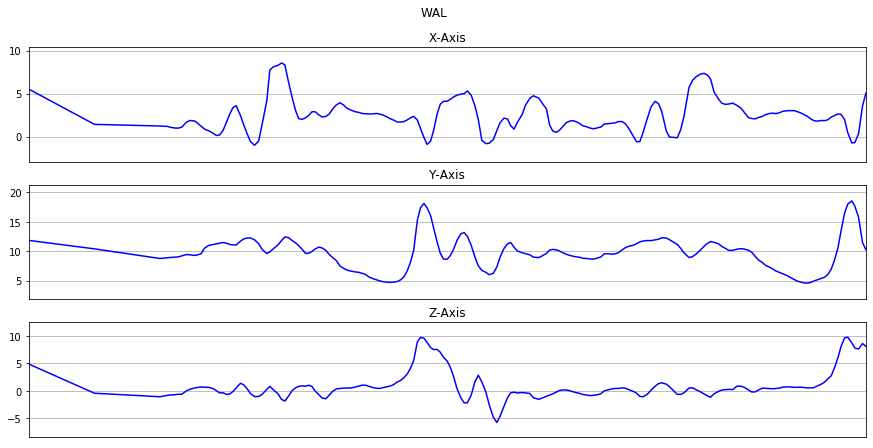

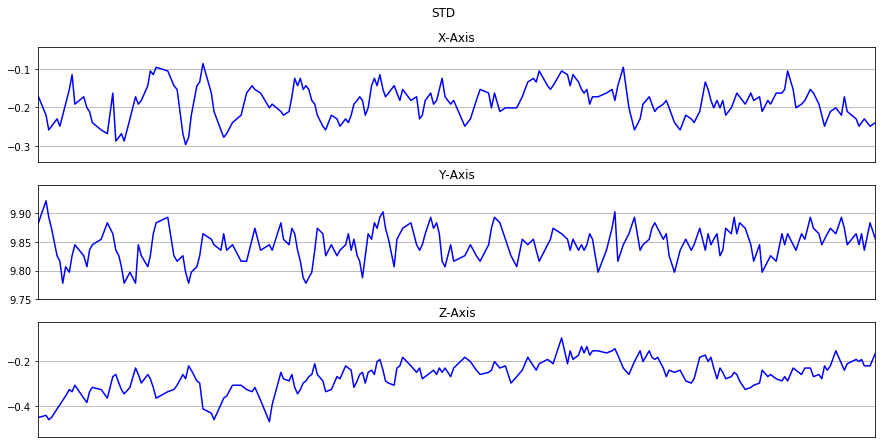

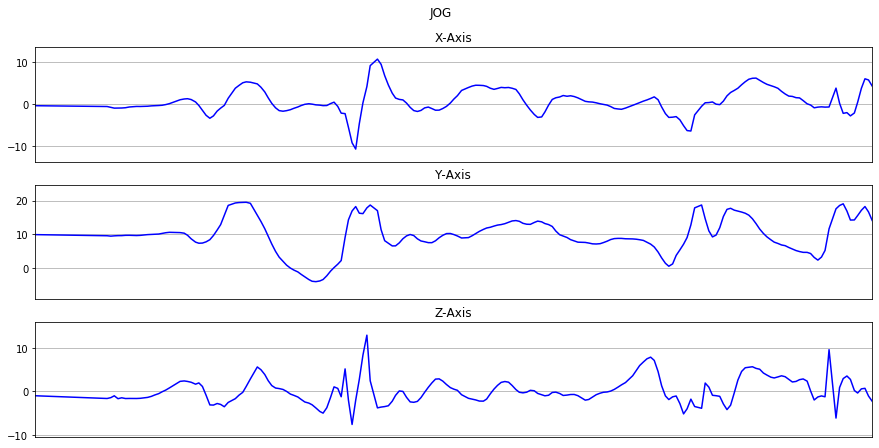

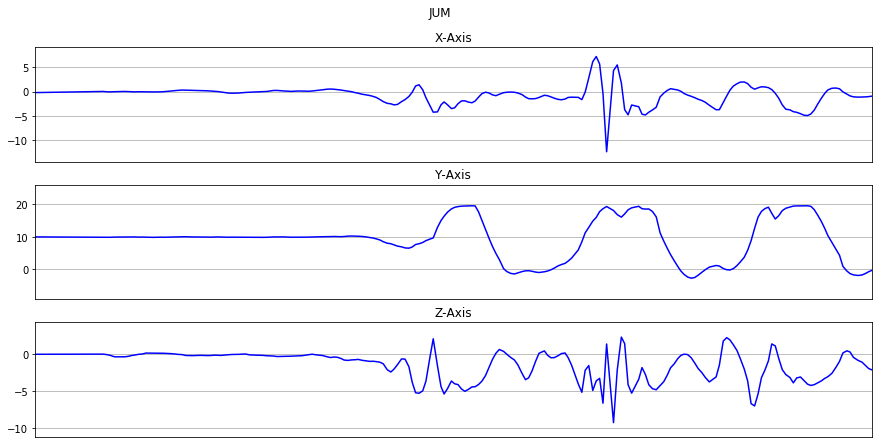

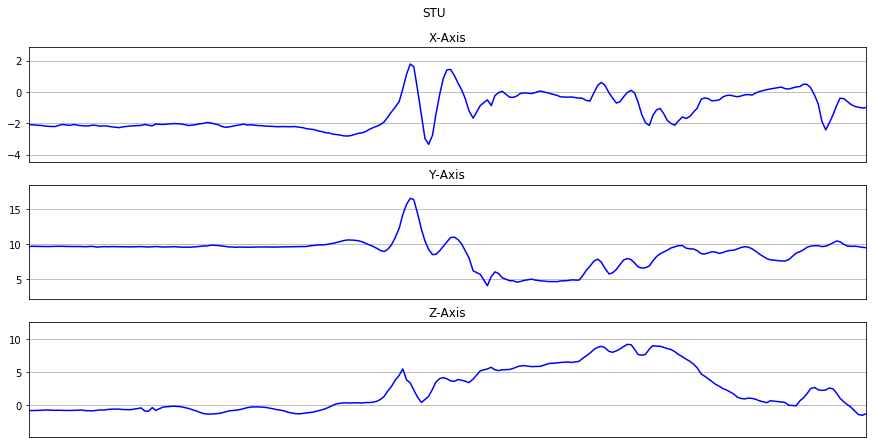

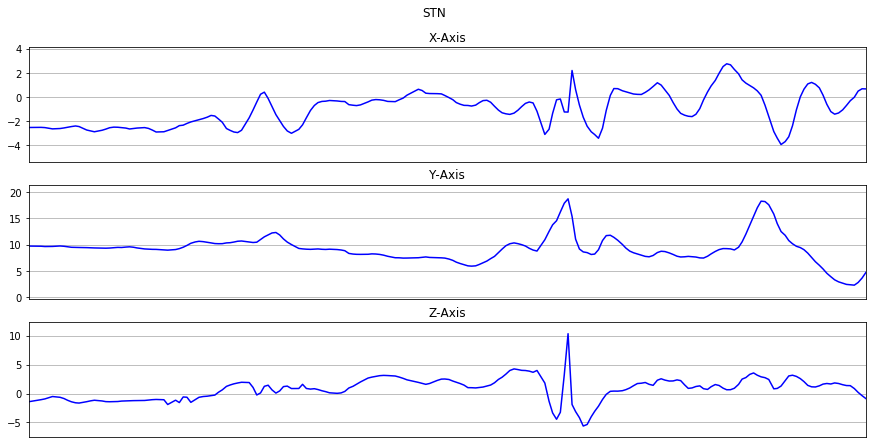

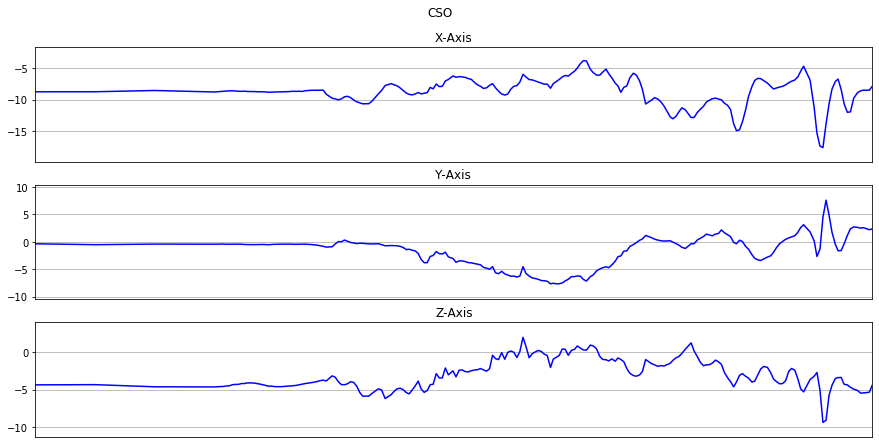

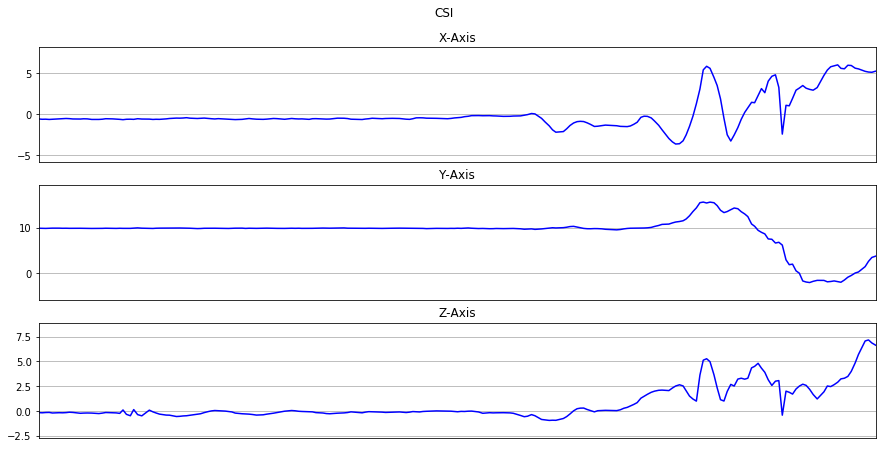

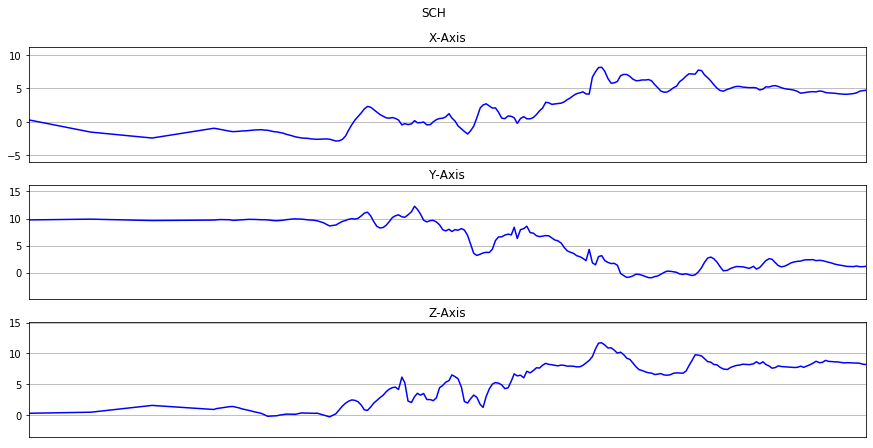

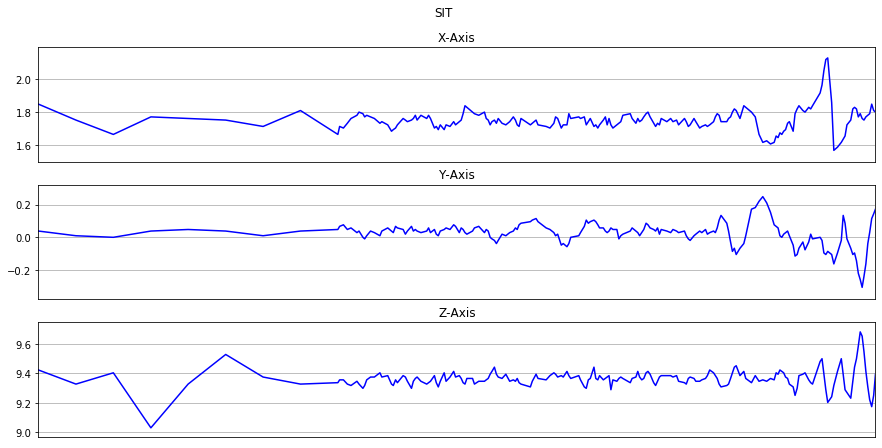

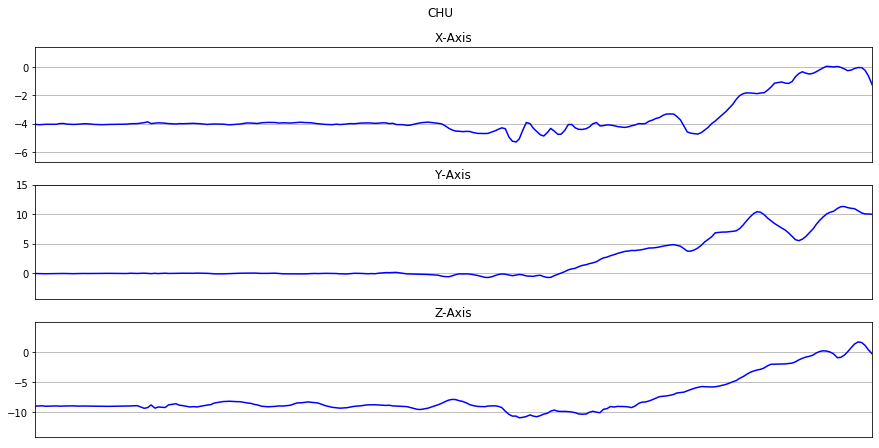

In [18]:
def plot_activity(Activity,data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, data['Time'], data['x'], 'X-Axis')
    plot_axis(ax1, data['Time'], data['y'], 'Y-Axis')
    plot_axis(ax2, data['Time'], data['z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(Activity)
    plt.subplots_adjust(top=0.90)
    plt.show()
    
def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'b')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for Activity in activities:
    data_for_plot = data[(data['Activity'] == Activity)][:Fs*10]
    plot_activity(Activity, data_for_plot)

In [21]:
df=data.drop(['User','Time'],axis=1).copy()
df.head()

,x,y,z,Activity
0,-0.172383,9.883265,-0.450110,STD
1,-0.220267,9.921572,-0.440533,STD
2,-0.258574,9.892841,-0.459687,STD
3,-0.248997,9.873688,-0.450110,STD
4,-0.229843,9.825804,-0.411803,STD


In [22]:
df['Activity'].value_counts()

WAL    1729683
STD    1317859
JOG     511585
JUM     501578
STU     305505
STN     302998
CSO     164927
CSI     163639
SCH     152401
SIT      77674
CHU      47522
Name: Activity, dtype: int64

In [23]:
label = LabelEncoder()
df['label'] = label.fit_transform(df['Activity'])
df.head()

,x,y,z,Activity,label
0,-0.172383,9.883265,-0.450110,STD,7
1,-0.220267,9.921572,-0.440533,STD,7
2,-0.258574,9.892841,-0.459687,STD,7
3,-0.248997,9.873688,-0.450110,STD,7
4,-0.229843,9.825804,-0.411803,STD,7


In [24]:
label.classes_

array(['CHU', 'CSI', 'CSO', 'JOG', 'JUM', 'SCH', 'SIT', 'STD', 'STN',
       'STU', 'WAL'], dtype=object)

## Standardrizing

In [25]:
X=df[['x','y','z']]
y=df['label']

In [26]:
scaler = StandardScaler()
X= scaler.fit_transform(X)

scaled_X  = pd.DataFrame(data = X,columns = ['x','y','z'])
scaled_X['label']= y.values

scaled_X

,x,y,z,label
0,-0.111117,0.431247,-0.243865,7
1,-0.124153,0.436782,-0.241153,7
2,-0.134581,0.432631,-0.246576,7
3,-0.131974,0.429864,-0.243865,7
4,-0.126760,0.422945,-0.233018,7
...,...,...,...,...
5275366,-0.332724,-2.373387,-0.590948,2
5275367,-0.322296,-2.374770,-0.582814,2
5275368,-0.319689,-2.378921,-0.574679,2
5275369,-0.330117,-2.373387,-0.588237,2


## Frame Preparation

In [27]:
Fs = 20
frame_size = Fs*4 # 80
hop_size = Fs*2 # 40

In [28]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [29]:
X, y = get_frames(scaled_X, frame_size, hop_size)

In [30]:
X.shape,y.shape        #(3555*)/40

((131883, 80, 3), (131883,))

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [32]:
X_train.shape, X_test.shape

((105506, 80, 3), (26377, 80, 3))

In [33]:
X_train[0].shape, X_test[0].shape

((80, 3), (80, 3))

In [34]:
X_train = X_train.reshape(X_train.shape[0], X_train[0].shape[0], X_train[0].shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test[0].shape[0], X_train[0].shape[1], 1)

## Build 2D CNN Model

In [38]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(12, activation='softmax'))

model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#history = model.fit(X_train, y_train, epochs = 50, validation_data= (X_test, y_test), verbose=1)

In [39]:
y_test.shape

(26377,)

In [40]:
history = model.fit(X_train, y_train, epochs = 50, validation_data= (X_test, y_test), verbose=1)

Epoch 1/50
3298/3298 [==============================] - 19s 6ms/step - loss: 0.8647 - accuracy: 0.7279 - val_loss: 0.5613 - val_accuracy: 0.8208
Epoch 2/50
3298/3298 [==============================] - 19s 6ms/step - loss: 0.6870 - accuracy: 0.7788 - val_loss: 0.5075 - val_accuracy: 0.8363
Epoch 3/50
3298/3298 [==============================] - 16s 5ms/step - loss: 0.6309 - accuracy: 0.7963 - val_loss: 0.4631 - val_accuracy: 0.8442
Epoch 4/50
3298/3298 [==============================] - 16s 5ms/step - loss: 0.5932 - accuracy: 0.8088 - val_loss: 0.4363 - val_accuracy: 0.8564
Epoch 5/50
3298/3298 [==============================] - 17s 5ms/step - loss: 0.5655 - accuracy: 0.8179 - val_loss: 0.4195 - val_accuracy: 0.8633
Epoch 6/50
3298/3298 [==============================] - 18s 5ms/step - loss: 0.5454 - accuracy: 0.8235 - val_loss: 0.4157 - val_accuracy: 0.8605
Epoch 7/50
3298/3298 [==============================] - 18s 5ms/step - loss: 0.5293 - accuracy: 0.8295 - val_loss: 0.4201 - val_ac

In [41]:
%time y_pred = model.predict_classes(X_test)

/Users/ozge.bursa/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


CPU times: user 1.63 s, sys: 432 ms, total: 2.07 s
Wall time: 1.31 s


In [42]:
model.save('../models/mobiact_cnn.h5')

In [43]:
# np.argmax(y_pred, axis=1) 

In [44]:
#history.history

In [45]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((105506, 80, 3, 1), (105506,), (26377, 80, 3, 1), (26377,))

In [47]:
print(accuracy_score(y_test, y_pred))

0.8993441255639383


## TFLITE CONVERTER

In [51]:
TFLITE_MODEL = '../tflite_models/mobiact/model_keras_lite.tflite'
TFLITE_DYNAMIC_MODEL = '../tflite_models/mobiact/model_keras_lite_dynamic.tflite'
TFLITE_FLOAT16_MODEL = '../tflite_models/mobiact/model_keras_lite_float16.tflite'

In [52]:
# Convert the model 
converter = tf.lite.TFLiteConverter.from_keras_model(model) # path to the SavedModel directory
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /var/folders/7r/4tyskpd90772kcc14kpglgdrz0lbv6/T/tmpqk24opf6/assets


INFO:tensorflow:Assets written to: /var/folders/7r/4tyskpd90772kcc14kpglgdrz0lbv6/T/tmpqk24opf6/assets


In [54]:
# Save the model.
with open(TFLITE_MODEL, 'wb') as f:
  f.write(tflite_model)

In [55]:
# Convert the model 
# Dynamic
converter = tf.lite.TFLiteConverter.from_keras_model(model) # path to the SavedModel directory
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model_dynamic = converter.convert()

INFO:tensorflow:Assets written to: /var/folders/7r/4tyskpd90772kcc14kpglgdrz0lbv6/T/tmp47v8iuyb/assets


INFO:tensorflow:Assets written to: /var/folders/7r/4tyskpd90772kcc14kpglgdrz0lbv6/T/tmp47v8iuyb/assets


In [56]:
# Save the model.
with open(TFLITE_DYNAMIC_MODEL, 'wb') as f:
  f.write(tflite_quant_model_dynamic)

In [57]:
# Convert the model 
# Float16
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
tflite_quant_model_float16 = converter.convert()

INFO:tensorflow:Assets written to: /var/folders/7r/4tyskpd90772kcc14kpglgdrz0lbv6/T/tmpkfwsb797/assets


INFO:tensorflow:Assets written to: /var/folders/7r/4tyskpd90772kcc14kpglgdrz0lbv6/T/tmpkfwsb797/assets


In [58]:
# Save the model.
with open(TFLITE_FLOAT16_MODEL, 'wb') as f:
  f.write(tflite_quant_model_float16)

In [59]:
'''
def representative_dataset():
    for _ in range(100):
      data = np.random.rand(1, 244, 244, 3)
      yield [data.astype(np.float32)]
        
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.representative_dataset = representative_dataset
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.EXPERIMENTAL_TFLITE_BUILTINS_ACTIVATIONS_INT16_WEIGHTS_INT8]
tflite_quant_model_int_16_8 = converter.convert()
'''

'\ndef representative_dataset():\n    for _ in range(100):\n      data = np.random.rand(1, 244, 244, 3)\n      yield [data.astype(np.float32)]\n        \nconverter = tf.lite.TFLiteConverter.from_keras_model(model)\nconverter.representative_dataset = representative_dataset\nconverter.optimizations = [tf.lite.Optimize.DEFAULT]\nconverter.target_spec.supported_ops = [tf.lite.OpsSet.EXPERIMENTAL_TFLITE_BUILTINS_ACTIVATIONS_INT16_WEIGHTS_INT8]\ntflite_quant_model_int_16_8 = converter.convert()\n'

## TFLITE INTERPRETER

## TFLITE

In [60]:
# Load the TFLite model and allocate tensors.  
interpreter = tf.lite.Interpreter(model_path=TFLITE_MODEL, num_threads=2)    #(model_content=tflite_model) 
interpreter.allocate_tensors()

In [61]:
# Get input and output tensors.    
input_det = interpreter.get_input_details()[0]
output_det = interpreter.get_output_details()[0]

In [62]:
input_det

{'name': 'conv2d_2_input',
 'index': 0,
 'shape': array([ 1, 80,  3,  1], dtype=int32),
 'shape_signature': array([-1, 80,  3,  1], dtype=int32),
 'dtype': numpy.float32,
 'quantization': (0.0, 0),
 'quantization_parameters': {'scales': array([], dtype=float32),
  'zero_points': array([], dtype=int32),
  'quantized_dimension': 0},
 'sparsity_parameters': {}}

In [63]:
output_det

{'name': 'Identity',
 'index': 15,
 'shape': array([ 1, 12], dtype=int32),
 'shape_signature': array([-1, 12], dtype=int32),
 'dtype': numpy.float32,
 'quantization': (0.0, 0),
 'quantization_parameters': {'scales': array([], dtype=float32),
  'zero_points': array([], dtype=int32),
  'quantized_dimension': 0},
 'sparsity_parameters': {}}

In [64]:
input_index = input_det["index"]
output_index = output_det["index"]
input_shape = input_det["shape"]
output_shape = output_det["shape"]
input_dtype = input_det["dtype"]
output_dtype = output_det["dtype"]

In [65]:
input_index, output_index, input_shape, output_shape, input_dtype, output_dtype

(0,
 15,
 array([ 1, 80,  3,  1], dtype=int32),
 array([ 1, 12], dtype=int32),
 numpy.float32,
 numpy.float32)

In [66]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((105506, 80, 3, 1), (105506,), (26377, 80, 3, 1), (26377,))

In [67]:
def predict(inp, input_dtype, output_shape, output_dtype, interpreter, input_index, output_index):
    inp = inp.astype(input_dtype)
    count = inp.shape[0]
    out = np.zeros((count, output_shape[1]), dtype=output_dtype)
    for i in range(count):
        interpreter.set_tensor(input_index, inp[i:i+1])
        interpreter.invoke()
        out[i] = interpreter.get_tensor(output_index)[0]
    return out

In [68]:
%time y_pred_lite = predict(X_test, input_dtype, output_shape, output_dtype, interpreter, input_index, output_index)

CPU times: user 1.16 s, sys: 29.1 ms, total: 1.19 s
Wall time: 1.23 s


In [69]:
y_pred_lite.shape

(26377, 12)

In [70]:
y_pred_lite = np.argmax(y_pred_lite, axis=1) 
y_pred_lite

array([10,  3, 10, ..., 10,  7,  7])

## TFLITE DYNAMIC

In [71]:
# Load the TFLite model and allocate tensors.  
interpreter = tf.lite.Interpreter(model_path=TFLITE_DYNAMIC_MODEL, num_threads=4)    #(model_content=tflite_model) 
interpreter.allocate_tensors()

# Get input and output tensors.    
input_det = interpreter.get_input_details()[0]
output_det = interpreter.get_output_details()[0]

input_index = input_det["index"]
output_index = output_det["index"]
input_shape = input_det["shape"]
output_shape = output_det["shape"]
input_dtype = input_det["dtype"]
output_dtype = output_det["dtype"]

In [72]:
%time y_pred_lite_dynamic = predict(X_test, input_dtype, output_shape, output_dtype, interpreter, input_index, output_index)

CPU times: user 27.9 s, sys: 188 ms, total: 28.1 s
Wall time: 7.16 s


In [73]:
y_pred_lite_dynamic = np.argmax(y_pred_lite_dynamic, axis=1) 
y_pred_lite_dynamic

array([10,  3, 10, ..., 10,  7,  7])

## TFLITE FLOAT16

In [74]:
# Load the TFLite model and allocate tensors.  
interpreter = tf.lite.Interpreter(model_path=TFLITE_FLOAT16_MODEL, num_threads=2)    #(model_content=tflite_model) 
interpreter.allocate_tensors()

# Get input and output tensors.    
input_det = interpreter.get_input_details()[0]
output_det = interpreter.get_output_details()[0]

input_index = input_det["index"]
output_index = output_det["index"]
input_shape = input_det["shape"]
output_shape = output_det["shape"]
input_dtype = input_det["dtype"]
output_dtype = output_det["dtype"]

In [75]:
input_shape

array([ 1, 80,  3,  1], dtype=int32)

In [76]:
%time y_pred_lite_float16 = predict(X_test, input_dtype, output_shape, output_dtype, interpreter, input_index, output_index)

CPU times: user 1.06 s, sys: 10.4 ms, total: 1.07 s
Wall time: 1.08 s


In [77]:
y_pred_lite_float16 = np.argmax(y_pred_lite_float16, axis=1) 
y_pred_lite_float16

array([10,  3, 10, ..., 10,  7,  7])

In [78]:

with tf.device('/gpu:0'):
    %time y_pred_lite_float16 = predict(X_test, input_dtype, output_shape, output_dtype, interpreter, input_index, output_index)


CPU times: user 1.07 s, sys: 12.1 ms, total: 1.08 s
Wall time: 1.09 s


In [79]:

with tf.device('/cpu:0'):
    %time y_pred_lite_float16 = predict(X_test, input_dtype, output_shape, output_dtype, interpreter, input_index, output_index)


CPU times: user 1.12 s, sys: 15.3 ms, total: 1.14 s
Wall time: 1.15 s


In [80]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


## Ploting Confusion Matrix

model.save_weights('cnn_model.h5')

In [81]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8993441255639383


In [82]:
print(accuracy_score(y_test, y_pred_lite))

0.8993441255639383


In [83]:
print(accuracy_score(y_test, y_pred_lite_dynamic))

0.8989650073928044


In [1]:
print(accuracy_score(y_test, y_pred_lite_float16))

NameError: name 'accuracy_score' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_cm_new(y_true, y_pred, class_names):
  cm = confusion_matrix(y_true, y_pred)
  fig, ax = plt.subplots(figsize=(18, 16)) 
  ax = sns.heatmap(
      cm, 
      annot=True, 
      fmt="d", 
      cmap=sns.color_palette("muted"),
      ax=ax
  )

  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  ax.set_xticklabels(class_names)
  ax.set_yticklabels(class_names)
  b, t = plt.ylim() # discover the values for bottom and top
  b += 0.5 # Add 0.5 to the bottom
  t -= 0.5 # Subtract 0.5 from the top
  plt.ylim(b, t) # update the ylim(bottom, top) values
  #plt.show() # ta-da!
  plt.savefig("confusion_matrix_cnn_im.png")

In [ ]:
plot_cm_new(
  label.inverse_transform(y_test),
  label.inverse_transform(y_pred),
  label.classes_
)

In [ ]:
label.classes_

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(label.inverse_transform(y_test), label.inverse_transform(y_pred)))
# Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(label.inverse_transform(y_test), label.inverse_transform(y_pred)))
# Recall
from sklearn.metrics import recall_score
print(recall_score(label.inverse_transform(y_test), label.inverse_transform(y_pred), average=None))
# Precision
from sklearn.metrics import precision_score
print(precision_score(label.inverse_transform(y_test), label.inverse_transform(y_pred), average=None))
# F1 score
from sklearn.metrics import f1_score
f1_score(label.inverse_transform(y_test), label.inverse_transform(y_pred), average=None)